# Menon Labs: Spotify Initial Data Analysis - Random Forest Model Training

### **Collaborators** 
- Ashna Sood 
- Shubhum Agrawal
- Shania Sinha
- Sergio Vazquez
- Rohil Khatkhate
- Kerrn Reehal

In [1]:
# import statements
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import pickle

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.metrics import make_scorer, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

In [2]:
# read in labeled songs CSV file
labeled_songs = pd.read_csv('final_labels.csv', index_col='id')
labeled_songs

,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,loudness,tempo,cluster,emotion
id,,,,,,,,,,,,,
35mvY5S1H3J2QZyna3TFe0,positions,['Ariana Grande'],0.468000,0.737,0.802,0.000000,0.0931,0.0878,0.682,-4.771,144.015,0,Energetic
6Hj9jySrnFppAI0sEMCZpJ,Robbery,['Juice WRLD'],0.328000,0.685,0.692,0.000000,0.1530,0.0457,0.578,-5.122,159.966,0,Energetic
2xLMifQCjDGFmkHkpNLD9h,SICKO MODE,['Travis Scott'],0.005130,0.834,0.730,0.000000,0.1240,0.2220,0.446,-3.714,155.008,0,Energetic
27X3qzgB0Show6qfw5wNOK,Esquema Preferido,"['DJ Ivis', 'Tarcísio do Acordeon']",0.256000,0.669,0.812,0.000000,0.0773,0.1100,0.917,-4.597,159.934,0,Energetic
2Y0wPrPQBrGhoLn14xRYCG,Come & Go (with Marshmello),"['Juice WRLD', 'Marshmello']",0.017200,0.625,0.814,0.000000,0.1580,0.0657,0.535,-5.181,144.991,0,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4qZq5qn0CSA6YF96OM5XVZ,Manifest- Manifest (2004),['Abuse'],0.000001,0.141,0.931,0.224000,0.3120,0.2010,0.613,-7.091,212.980,29,Powerful
6T0aBJyFi7U3zHuaYSMWIP,Bach Jao Mundeyo,['Sardool Sikander'],0.533000,0.658,0.852,0.000002,0.0582,0.3560,0.801,-7.159,183.985,29,Powerful
2n8nDfBot4MddUcUKoAqGz,Horseface,['Yea(H)'],0.004480,0.306,0.982,0.243000,0.1800,0.0416,0.558,-5.640,188.499,29,Powerful


In [3]:
# define X and y
X = labeled_songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
                            'speechiness', 'valence', 'loudness', 'tempo']]
y = labeled_songs.iloc[:, -1:]

In [4]:
# split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# create and train the Random Forests model 
# also trained with n_estimators 200, 500, and 2000, but 1000 was the optimal value 
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=13)
rf_model.fit(X_train,y_train)

print("Done")

Done


In [7]:
# calculate F1 Score# calculate the training accuracy
rf_train_acc = rf_model.score(X_train, y_train)
print("Training Set accuracy:", rf_train_acc)

# make predictions and calculate the testing accuracy
rf_pred = (rf_model.predict(X_test))
rf_true = y_test
rf_test_acc = accuracy_score(rf_true, rf_pred)
print("Test Set accuracy:", rf_test_acc)

Training Set accuracy: 0.5195460631653854
Test Set accuracy: 0.5183395755305867


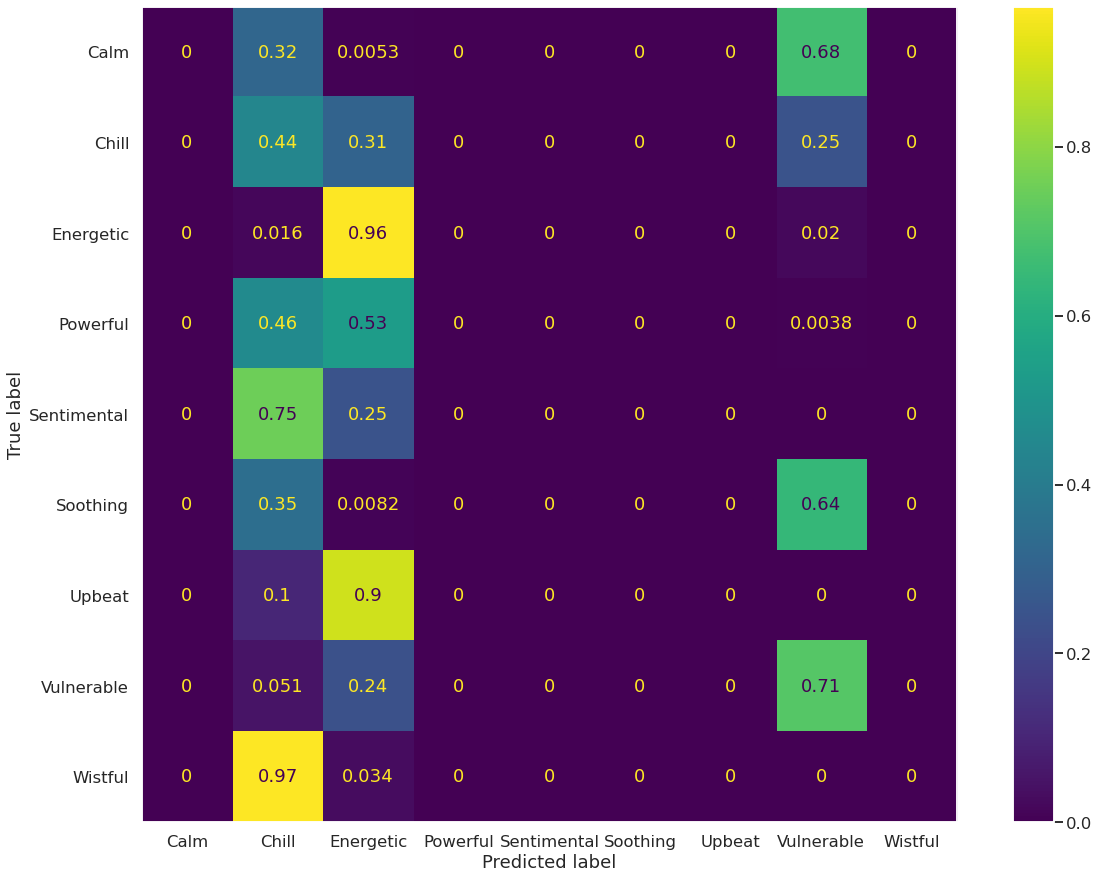

In [8]:
# caclulate confusion matrix to visualize TP, FP, TN, FN rates 
fig, ax = plt.subplots(figsize=(20, 15))
plot_confusion_matrix(rf_model,X_test,y_test,normalize='true', ax=ax)
plt.grid(False)

In [10]:
# save X_test predicted emotion labels and compare with actual label
results = pd.DataFrame(rf_true)
results["Predicted"] = rf_pred
results.columns = ["Actual", "Predicted"]
results

,Actual,Predicted
id,,
1KeZNwor1yQg3bsw5gE41r,Energetic,Energetic
0NHDGurGVugHacPrM1siDY,Vulnerable,Vulnerable
0KEWlPJ12ucClvhhagU8Bw,Upbeat,Energetic
5KiS8SFnu21xI74mHgfZ3D,Energetic,Energetic
5BBaK1uYAlw1I1KVyarsss,Energetic,Energetic
...,...,...
7Lgarpf1OqaXsUTjKZ34mK,Powerful,Energetic
2g7CcEEAGuQIDEYasu4QUX,Powerful,Energetic
5EExzDL08s6b0kzNgUYvX3,Energetic,Energetic


In [11]:
# incorrectly identified songs 
incorrect_results = results.loc[results["Actual"] != results["Predicted"]]   
incorrect_results

,Actual,Predicted
id,,
0KEWlPJ12ucClvhhagU8Bw,Upbeat,Energetic
1I9WdHGgngMWE098IqzdYh,Calm,Vulnerable
2iG2fWhyDZwiRayrMV98aI,Sentimental,Chill
5HkHeKosDmXQK5gwahg7ay,Powerful,Chill
3rff3PUip0WQ1Qra2kghYL,Chill,Energetic
...,...,...
3Pu5yYl03EsVMQZXZ3CLgG,Upbeat,Energetic
4Rv31xbqlO9TIy1qM8wHAY,Chill,Energetic
43xbE3YGBsFHK6ESpPnXiy,Sentimental,Chill


In [12]:
# audio features for the incorrectly identified songs
incorrect_vals = pd.merge(labeled_songs, incorrect_results, on='id', how='left')
incorrect_vals.dropna(inplace=True)
incorrect_vals

,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,loudness,tempo,cluster,emotion,Actual,Predicted
id,,,,,,,,,,,,,,,
5tVA6TkbaAH9QMITTQRrNv,Free Fallin',['Tom Petty'],0.212000,0.623,0.449,0.000000,0.0613,0.0253,0.572,-13.333,84.383,1,Chill,Chill,Vulnerable
5s2zbxZI4Ym5LTKwjZHS2V,Jealous,['Eyedress'],0.004910,0.474,0.921,0.859000,0.4760,0.0457,0.696,-10.431,93.007,1,Chill,Chill,Energetic
2E532ozrMbRXwuZkpoegUP,happy,['Skinnyfabs'],0.537000,0.736,0.432,0.039700,0.1100,0.0269,0.706,-11.636,87.999,1,Chill,Chill,Vulnerable
2ujDy4LjQOTm2hOQdO2r71,Omae Wa Mou,['deadman 死人'],0.128000,0.732,0.735,0.756000,0.0983,0.0619,0.722,-11.729,93.042,1,Chill,Chill,Energetic
2gQaQUhDCNGfBVXTvxAmXQ,Shout,['Tears For Fears'],0.174000,0.511,0.942,0.000019,0.1390,0.0429,0.498,-10.407,97.909,1,Chill,Chill,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1rb1cZ1vRXgpdikJfHI7z1,Fast Horse,['Aka Odko'],0.000274,0.688,0.433,0.677000,0.1470,0.1130,0.284,-10.476,194.066,29,Powerful,Powerful,Chill
6R6GyWnuDk9fG3Xpit330h,"Lights - Live At The O2, London, UK / 2007",['Scissor Sisters'],0.002430,0.358,0.890,0.001960,0.9680,0.0546,0.587,-6.042,204.145,29,Powerful,Powerful,Energetic
7CqdfsIpPLbvPkG5kiwlO9,I Know (demo),['Tunghook'],0.001090,0.534,0.788,0.026600,0.3300,0.0753,0.783,-6.168,198.970,29,Powerful,Powerful,Energetic


In [22]:
# calculate F1 Score as a further metric to evaluate model performance
from sklearn.metrics import f1_score
f1_score(rf_true, rf_pred, average='weighted')

0.4167672786110909

Ultimately, the Random Forest model performed poorly as it only achieved a test set accuracy of 51.8%, which is no better than a random guess. Ultimately, the Random Forest model was not used as the final model to predict the emotion label of a song.

In [9]:
# save the model
# Save to file in the current working directory
pkl_filename = "final_RF_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_model, file)